# Work With Time Series File For ESSP4
There is one time series file for each data set of the form: `DS#_timeSeries.csv`

For example, the relevant file for data set three (3) would be: `DS3_timeSeries.csv`

Please see the [ESSP website](https://essp-eprv.github.io/data.html#timeseries) for more information

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# Specify file name
dset_num = 1
dset_dir = f'/mnt/home/lzhao/ceph/SolarData/DataSets/Training/DS{dset_num}/'
example_file = os.path.join(dset_dir,f'DS{dset_num}_timeSeries.csv')

## Read in with `pandas`

In [3]:
df = pd.read_csv(example_file)
# Show a snippet of the beginning of the table
df.head()

,Standard File Name,Time [eMJD],RV [m/s],RV Err. [m/s],Exp. Time [s],Airmass,BERV [km/s],Instrument,CCF FWHM [km/s],CCF FWHM Err. [km/s],CCF Contrast,CCF Contrast Err.,BIS [m/s],H-alpha Emission,CaII Emission
0,DS1.001_spec_expres.fits,59332.189797,0.457618,0.175,171.328003,1.043292,-873470.802871,expres,6.575316,0.016461,-331658.144491,566.714052,-62.150000,0.171580,0.101278
1,DS1.002_spec_expres.fits,59332.197387,2.909618,0.175,172.710999,1.036903,-890201.347972,expres,6.579385,0.016852,-331664.020024,579.700435,-65.383333,0.171918,0.098143
2,DS1.003_spec_expres.fits,59332.200011,1.734618,0.175,170.763992,1.035140,-896013.033993,expres,6.578262,0.016516,-331734.120654,568.400481,-65.733333,0.172180,0.099741
3,DS1.004_spec_harpsn.fits,59332.836022,-1.370231,0.162,300.000000,1.320948,-0.051096,harpsn,6.669695,0.014380,-416001.378021,608.952395,-41.766667,0.174735,0.099259
4,DS1.005_spec_harpsn.fits,59332.840022,-2.074231,0.160,300.000000,1.298025,-0.057561,harpsn,6.667775,0.014731,-415949.760210,623.857078,-41.633333,0.174129,0.105292


In [4]:
# Show all the column names
df.columns

Index(['Standard File Name', 'Time [eMJD]', 'RV [m/s]', 'RV Err. [m/s]',
       'Exp. Time [s]', 'Airmass', 'BERV [km/s]', 'Instrument',
       'CCF FWHM [km/s]', 'CCF FWHM Err. [km/s]', 'CCF Contrast',
       'CCF Contrast Err.', 'BIS [m/s]', 'H-alpha Emission', 'CaII Emission'],
      dtype='object')

## Plot RVs and Errors

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


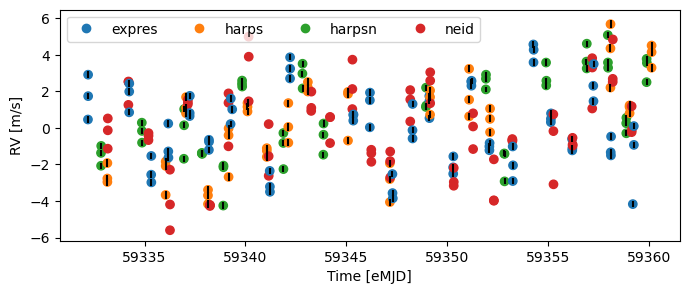

In [5]:
plt.figure(figsize=(8,3))
plt.xlabel('Time [eMJD]')
plt.ylabel('RV [m/s]')
# Get a list of different instruments and their indices
inst_list, inst_invs = np.unique(df['Instrument'],return_inverse=True)
# Plot RVs colored by instrument
plt.scatter(df['Time [eMJD]'],df['RV [m/s]'],
            c=inst_invs, # color by instrument
            cmap='tab10',vmin=0,vmax=10) # adjusting so familiar python colors are used
# Generate Legend
for inst in inst_list:
    plt.plot(np.nan,'o',label=inst)
# Plot error bars
plt.errorbar(df['Time [eMJD]'],df['RV [m/s]'],yerr=df['RV Err. [m/s]'],
             linestyle='None',color='k')

plt.legend(loc=2,ncol=4)

## Plot Indicators

In [6]:
def getInstrumentMask(df):
    inst_col = df['Instrument'].to_numpy()
    inst_list = np.unique(inst_col)
    inst_masks = {}
    for inst in inst_list:
        inst_masks[inst] = inst_col==inst
    return inst_masks

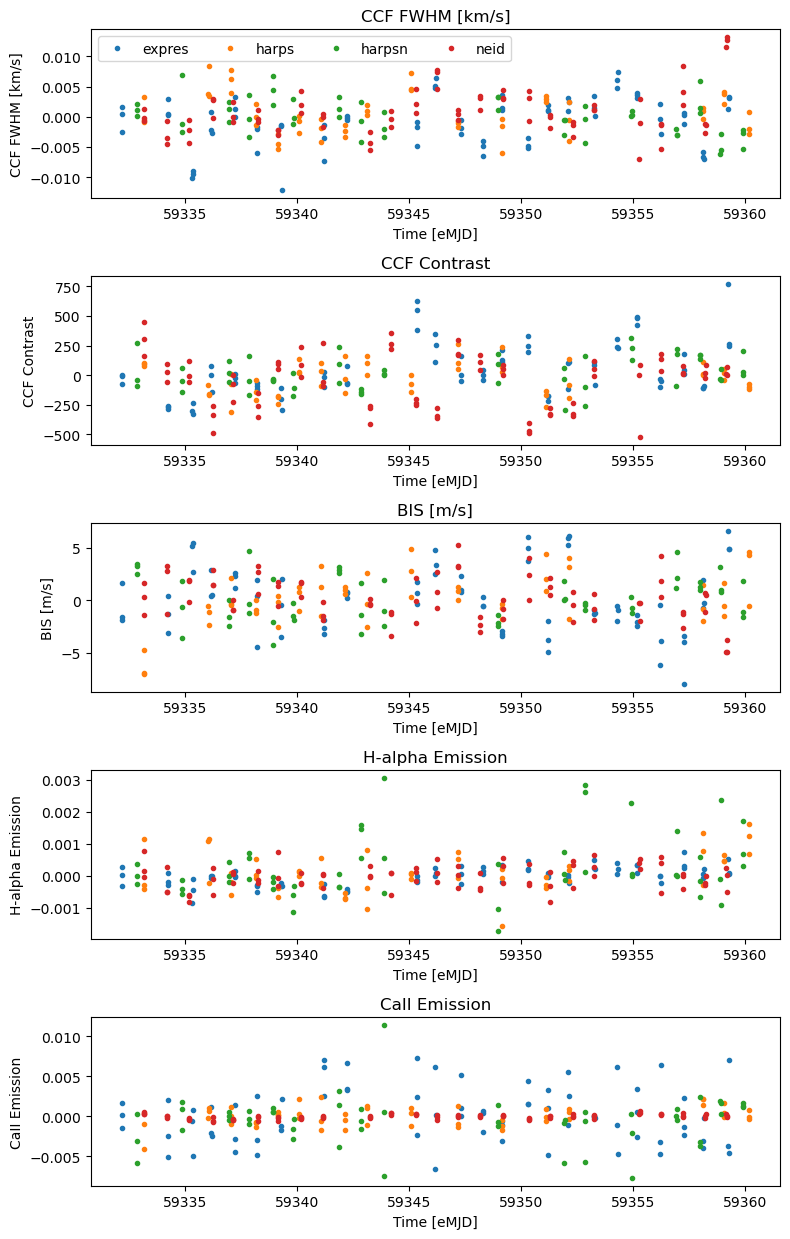

In [7]:
# List of indicators to plot
ind_names = ['CCF FWHM [km/s]', 'CCF Contrast', 'BIS [m/s]',
             'H-alpha Emission', 'CaII Emission']
# Generate masks to isolate observations from each instrument
inst_masks = getInstrumentMask(df)

fig, axes = plt.subplots(len(ind_names),1,figsize=(8,len(ind_names)*2.5))
for iind, ind in enumerate(ind_names):
    # Set up a subplot for each indicator
    ax = axes[iind]
    ax.set_title(ind)
    ax.set_xlabel('Time [eMJD]')
    ax.set_ylabel(ind)
    # Plot indicators from each instrument
    for inst in inst_masks.keys():
        imask = inst_masks[inst]
        # Find a unique offset for the indicator for each instrument
        ind_offset = np.nanmedian(df[ind][imask])
        ax.plot(df['Time [eMJD]'][imask],df[ind][imask]-ind_offset,'.',label=inst)
axes[0].legend(ncol=4)
fig.tight_layout()

## Rename Columns
I'm not crazy; I know the column names are unwieldy.  Here is code to re-name columns to those of your choosing using `pandas`.  New column names are defined using a dictionary that maps old names to new.  The dictionary does not need to include all column names.

In [8]:
# To rename columns, specify a dictionary like the following
#     The key should be the original column name; the value should be the new name
#     Below are just some example new column names
col_dict = {
    'Standard File Name' : 'file',
    'Time [eMJD]' : 'time',
    'RV [m/s]' : 'rv',
    'RV Err. [m/s]' : 'e_rv',
    'Exp. Time [s]' : 'exptime',
    'Airmass' : 'airmass',
    'BERV [km/s]' : 'berv',
    'Instrument' : 'inst',
    'CCF FWHM [km/s]' : 'fwhm',
    'CCF FWHM Err. [km/s]' : 'e_fwhm',
    'CCF Contrast' : 'contrast',
    'CCF Contrast Err.' : 'e_contrast',
    'BIS [m/s]' : 'bis',
    'H-alpha Emission' : 'ha',
    'CaII Emission' : 'caii'
}

In [9]:
df = pd.read_csv(example_file) # read in data
renamed_df = df.rename(columns=col_dict) # rename the columns
renamed_df.head() # show snippet of the beginning of the renamed table

,file,time,rv,e_rv,exptime,airmass,berv,inst,fwhm,e_fwhm,contrast,e_contrast,bis,ha,caii
0,DS1.001_spec_expres.fits,59332.189797,0.457618,0.175,171.328003,1.043292,-873470.802871,expres,6.575316,0.016461,-331658.144491,566.714052,-62.150000,0.171580,0.101278
1,DS1.002_spec_expres.fits,59332.197387,2.909618,0.175,172.710999,1.036903,-890201.347972,expres,6.579385,0.016852,-331664.020024,579.700435,-65.383333,0.171918,0.098143
2,DS1.003_spec_expres.fits,59332.200011,1.734618,0.175,170.763992,1.035140,-896013.033993,expres,6.578262,0.016516,-331734.120654,568.400481,-65.733333,0.172180,0.099741
3,DS1.004_spec_harpsn.fits,59332.836022,-1.370231,0.162,300.000000,1.320948,-0.051096,harpsn,6.669695,0.014380,-416001.378021,608.952395,-41.766667,0.174735,0.099259
4,DS1.005_spec_harpsn.fits,59332.840022,-2.074231,0.160,300.000000,1.298025,-0.057561,harpsn,6.667775,0.014731,-415949.760210,623.857078,-41.633333,0.174129,0.105292


## Read Into Dictionary
If you don't like using `pandas` objects, I recommend using `pandas` to convert into a dictionary of lists.  The only annoying thing with this option is that each time series will be turned into a `list`, not a numpy array, and therefore will be missing some functionality.

Because of the structure of the CSV file and the mix of data types, it is pretty non-trivial to read the file in using `numpy` alone.

In [10]:
df = pd.read_csv(example_file) # read in data
data_dict = df.to_dict('list') # change to a dictionary of lists

<ErrorbarContainer object of 3 artists>

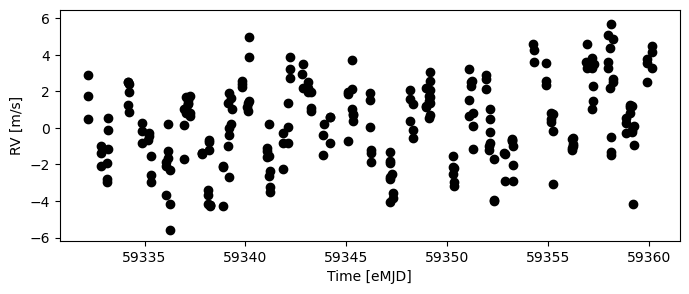

In [11]:
# The keys for the new dictionary are the column names
plt.figure(figsize=(8,3))
plt.xlabel('Time [eMJD]')
plt.ylabel('RV [m/s]')
plt.errorbar(data_dict['Time [eMJD]'],data_dict['RV [m/s]'],yerr=data_dict['RV Err. [m/s]'],
             linestyle='None',marker='o',color='k')